In [1]:
#import datas

import pandas as pd
import numpy as np
df = pd.read_csv('./TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#print(df)
headers = list(df.columns)
#print(headers)

In [2]:
#select a subset of columns
# df = pd.DataFrame(df, columns=['Source Port', 'Source Port', 'Destination IP', 'Destination Port', 'Label'])
# print(df.head())

In [3]:
headers = headers[8:]
headers = np.delete(headers, [13, 14], 0)
X = df.iloc[:, 7:-1].values
y = df.iloc[:, -1].values
X = np.delete(X, [13, 14], 1)
# print(X)
# print(y)

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X=X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [5]:
# print(np.all(np.isfinite(X))) #and gets False
# for i in range(X.shape[0]):
#     for j in range(X.shape[1]): 
#         if not np.isfinite(X[i][j]):
#             print(i, j, X[i][j])
# np.isfinite(X).all()
# np.argwhere(np.isnan(X))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
classifier = SelectFromModel(RandomForestClassifier(n_estimators = 100, criterion = 'entropy'))
classifier.fit(X_train, y_train)
boolfeature = classifier.get_support()

In [9]:
selected_feat= headers[(classifier.get_support())]
print(selected_feat)
print(len(selected_feat))

['Total Length of Fwd Packets' ' Total Length of Bwd Packets'
 ' Fwd Packet Length Max' ' Fwd Packet Length Min'
 ' Fwd Packet Length Std' 'Bwd Packet Length Max'
 ' Bwd Packet Length Mean' ' Bwd Packet Length Std' 'Flow Bytes/s'
 ' Fwd IAT Mean' ' Fwd IAT Std' ' Fwd IAT Max' ' Fwd IAT Min'
 ' Bwd Header Length' 'Fwd Packets/s' ' Avg Fwd Segment Size'
 ' Avg Bwd Segment Size' ' Fwd Header Length.1' 'Fwd Avg Bytes/Bulk'
 ' Subflow Fwd Bytes' ' Subflow Bwd Packets' ' Subflow Bwd Bytes'
 ' Init_Win_bytes_backward' ' act_data_pkt_fwd' ' min_seg_size_forward']
25


In [10]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

Feature: 0, Score: 0.01649
Feature: 1, Score: 0.06525
Feature: 2, Score: 0.01316
Feature: 3, Score: 0.12923
Feature: 4, Score: 0.07507
Feature: 5, Score: 0.01685
Feature: 6, Score: 0.01781
Feature: 7, Score: 0.01291
Feature: 8, Score: 0.03958
Feature: 9, Score: 0.02117
Feature: 10, Score: 0.01573
Feature: 11, Score: 0.04174
Feature: 12, Score: 0.02491
Feature: 13, Score: 0.03036
Feature: 14, Score: 0.00406
Feature: 15, Score: 0.01225
Feature: 16, Score: 0.12790
Feature: 17, Score: 0.02461
Feature: 18, Score: 0.02971
Feature: 19, Score: 0.01120
Feature: 20, Score: 0.09824
Feature: 21, Score: 0.01135
Feature: 22, Score: 0.08224
Feature: 23, Score: 0.00822
Feature: 24, Score: 0.06997


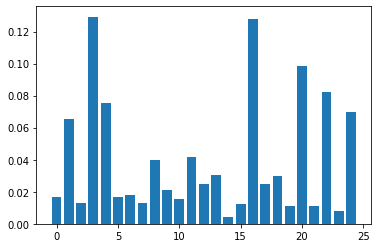

In [17]:
# summarize feature importance
import matplotlib.pyplot as plt
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [12]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['BENIGN' 'BENIGN']
 ['BENIGN' 'BENIGN']
 ['BENIGN' 'BENIGN']
 ...
 ['BENIGN' 'BENIGN']
 ['BENIGN' 'BENIGN']
 ['BENIGN' 'BENIGN']]


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[19460     0]
 [   10 25679]]


0.9997785111519635

In [14]:
headers = np.delete(headers, ~boolfeature, 0)
X = np.delete(X, ~boolfeature, 1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)
classifier = SelectFromModel(RandomForestClassifier(n_estimators = 100, criterion = 'entropy'))
classifier.fit(X_train, y_train)
classifier.get_support()
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [16]:
selected_feat= headers[(classifier.get_support())]
print(selected_feat)
print(len(selected_feat))

[' Total Length of Bwd Packets' ' Fwd Packet Length Min'
 ' Fwd Packet Length Std' ' Avg Bwd Segment Size' ' Subflow Bwd Packets'
 ' Init_Win_bytes_backward' ' min_seg_size_forward']
7
